# 문제 1. 기초통계량 계산
**📘 문제**
- 온라인 쇼핑몰 고객 1,000명을 대상으로 1점부터 10점 사이의 만족도 조사를 실시했습니다.
이 데이터를 바탕으로 고객 만족도의 **중심 경향성**과 **분포 특성**을 파악해 봅시다.

<br>

**📌 아래를 수행해 보세요:**

  - 평균, 중앙값, 최빈값, 표준편차를 계산해 봅시다.
  - 히스토그램을 그리고 평균과 중앙값 선으로 표시해 봅시다.
  - 데이터의 분포 형태를 해석한 후, 마케팅 전략 수립에 어떻게 활용할 수 있을지 생각해 봅시다.

In [3]:
# 파이썬 라이브러리 및 모듈 가져오기 & 한글 폰트 설정하기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

# MacOS에서는 기본 한글 폰트로 AppleGothic 사용
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [4]:
# 데이터 생성
np.random.seed(2025)
satisfaction = np.random.normal(7.5, 1.5, 1000)
satisfaction = np.clip(satisfaction, 1, 10)
df1 = pd.DataFrame({'score': satisfaction})

In [5]:
df1

,score
0,7.361415
1,8.601428
2,5.341677
3,6.504867
4,7.348908
...,...
995,5.588019
996,7.039904
997,6.907670
998,5.075884


In [6]:
# 기초 통계량 계산
mean = df1['score'].mean()
median = df1['score'].median()
mode = (df1['score']).mode()[0]
std = df1['score'].std()

print(f"평균: {mean:.2f}")
print(f"중앙값: {median:.2f}")
print(f"최빈값: {mode:.2f}")
print(f"표준편차: {std:.2f}")

평균: 7.43
중앙값: 7.42
최빈값: 10.00
표준편차: 1.39


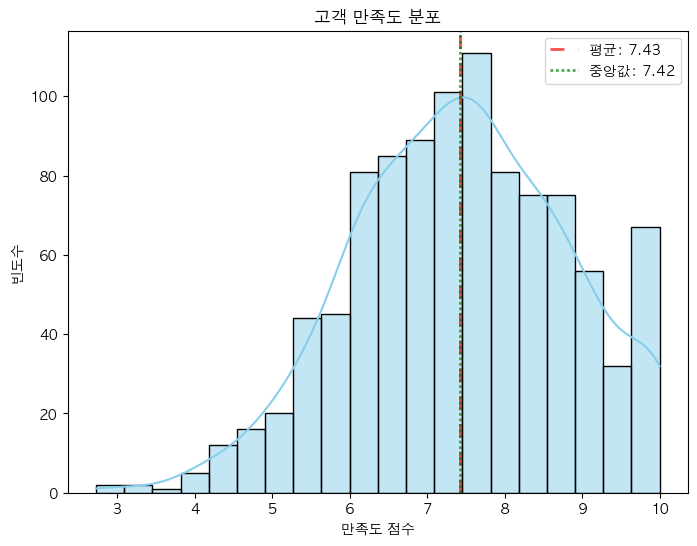

In [7]:
# 히스토그램 + 평균/중앙값 선 표시
plt.figure(figsize=(8,6))
sns.histplot(df1['score'], bins=20, kde=True, color='skyblue')

# 평균, 중앙값 선 그리기
plt.axvline(mean, color = 'red', linestyle=(0,(5,5)), linewidth=2, alpha=0.7, label=f'평균: {mean:.2f}')
plt.axvline(median, color = 'green', linestyle=(0,(1,1)), linewidth=2, alpha=0.7, label=f'중앙값: {median:.2f}')

plt.title("고객 만족도 분포")
plt.xlabel("만족도 점수")
plt.ylabel("빈도수")
plt.legend()
plt.show()

In [8]:
# 7점 이상 비율 확인
high_score_ratio = (df1['score'] >= 7).mean() * 100
print(f"7점 이상 고객 비율: {high_score_ratio:.2f}%")


7점 이상 고객 비율: 62.20%


**🧠 데이터를 어떻게 읽을까요?**

1. 평균과 중앙값 사이의 차이는 어느 정도인가요?  
-> 평균: 7.43, 중앙값: 7.42 → 차이: 0.01  

- 두 값이 비슷하다면, 이 데이터는 어떤 분포 형태일 가능성이 있을까요? (예: 대칭형, 정규분포 등)  
-> 두 값이 매우 비슷하므로, 데이터는 대칭형(정규분포에 가까움)으로 볼 수 있다.  

- 두 값의 차이가 크다면, 그 이유는 무엇일까요?  
-> 이상값(Outlier)이나 특정 구간에 몰린 값들 때문에 평균이 끌려갔을 수 있다.  

- 어떤 값들이 평균을 끌어내리거나 끌어올렸을까요?  
-> 극단적으로 낮은 점수(1~3점)나 극단적으로 높은 점수(9~10점)가 평균을 변화시킨다.  

---

2. 최빈값이 평균보다 낮은 경우, 낮은 점수를 준 고객이 많다는 뜻일 수 있습니다. 이 경우 데이터 분포는 어느 쪽으로 치우쳐 있을까요?  
-> 왼쪽  

- 반대로 최빈값이 평균보다 높은 경우에는 어떤 해석이 가능할까요? 이럴 때 분포가 어떻게 달라질 수 있을까요?  
-> 오른쪽으로 치우쳐 있음. 높은 점수를 준 고객이 많다.  

---

3. 이 데이터를 바탕으로 고객 만족도를 높이기 위한 마케팅 전략에는 어떤 것들이 있을까요?  
->  
- 긍정적 홍보: 약 62%의 고객이 7점 이상을 줬다는 점을 마케팅 메시지로 활용  
- 불만 고객 관리: 6점 이하 고객을 분석해 불만 요인을 개선  
- 충성 고객 강화: 최빈값이 8점인 고객층을 VIP 집단으로 정의하고 멤버십, 추가 혜택 제공  
- 일관성 유지: 표준편차가 약 1.39로 크지 않아, 대부분의 점수가 6~9점에 집중 → 현재 수준의 서비스 품질을 꾸준히 유지하는 게 중요  


# 문제 2. 평균 vs 중앙값 비교

**📘 문제**
- A지역과 B지역의 연봉 데이터를 비교해 봅시다.
- B 지역에는 일부 고소득자가 포함되어 있습니다.

<br>

**📌 아래를 수행해 보세요:**
- 각 지역의 평균 연봉과 중앙값을 구해 봅시다.
- 지역별 박스플롯(Boxplot)을 그려서 분포의 차이를 시각적으로 확인해 봅시다.

In [9]:
# 데이터 생성
np.random.seed(2025)

# A 지역: 평균 300, 표준편차 50
region_a = np.random.normal(300, 50, 100)

# B 지역 : 일반 소득자 + 극단적인 고소득자 포함
region_b = np.concatenate([
    np.random.normal(280, 40, 95),      # 일반 소득자 95명
    np.random.normal(1500, 200, 5)      # 고소득자 5명
])

df2 = pd.DataFrame({
    'region': ['A'] * 100 + ['B'] * 100,
    'salary': np.concatenate([region_a, region_b])
})

pd.DataFrame({...}) : 판다스 데이터프레임 생성

'region': ['A'] * 100 + ['B'] * 100

['A'] * 100 → A가 100번 반복된 리스트

['B'] * 100 → B가 100번 반복된 리스트

합치면 총 200개 (앞 100개는 A, 뒤 100개는 B)

즉, 각 행이 어느 지역 데이터인지 표시

'salary': np.concatenate([region_a, region_b])

위에서 만든 A지역과 B지역 연봉 데이터를 합침

총 200개의 연봉 숫자가 들어감

In [10]:
df2

,region,salary
0,A,295.380491
1,A,336.714279
2,A,228.055899
3,A,266.828899
4,A,294.963596
...,...,...
195,B,1668.477201
196,B,1581.119661
197,B,1637.123979
198,B,1709.906631


In [11]:
# 각 지역의 평균 연봉과 중앙값 구하기
group_stats = df2.groupby('region')['salary'].agg(['mean', 'median'])
group_stats

,mean,median
region,,
A,292.506637,294.324483
B,347.594909,287.347488


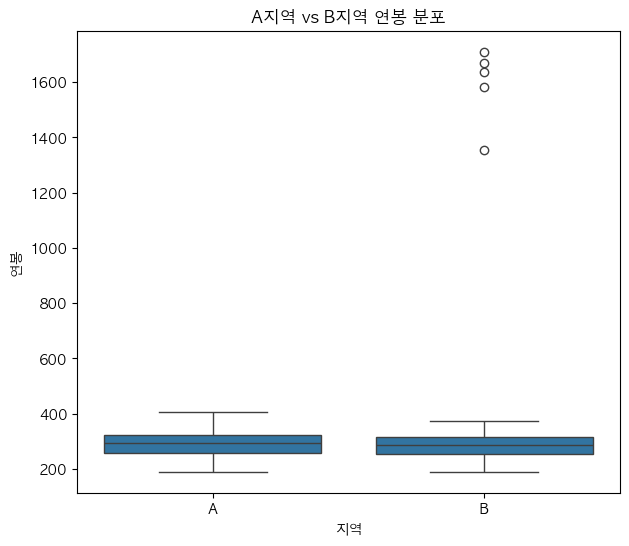

In [12]:
# 박스플롯 그리기
plt.figure(figsize=(7,6))
sns.boxplot(x='region', y='salary', data=df2)

plt.title("A지역 vs B지역 연봉 분포")
plt.xlabel("지역")
plt.ylabel("연봉")
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. A 지역과 B 지역의 평균 연봉은 어떻게 다른가요?  
   - 두 지역의 평균 차이가 의미하는 바는 무엇인가요?  
   -> A 지역 평균: 292.51, B 지역 평균: 347.59 / B 지역의 평균 연봉이 더 높다.  
   - 고소득자가 있는 지역의 평균은 어떤 영향을 받을까요?  
   -> 평균값이 높아진다.  

2. 중앙값은 어떠한가요?  
   - 평균과 비교했을 때, 중앙값이 더 낮거나 높다면 어떤 해석이 가능할까요?  
   -> A 지역 중앙값: 294.32, B 지역 중앙값: 287.35 / B 지역은 평균은 높지만 중앙값은 낮으므로, 소수의 고소득자가 평균을 끌어올린 것으로 해석할 수 있다.  

3. 극단값(고소득자)의 영향은 어디에서 더 크게 나타날까요?  
   - 평균과 중앙값 중 어떤 지표가 극단값에 더 민감한가요?  
   -> 평균  

4. 박스플롯을 통해 어떤 점을 관찰할 수 있나요?  
   - 이상치(Outlier)는 어떻게 표시되나요?  
   -> 박스 수염을 벗어난 동그라미로 표시된다.  
   - 두 지역의 분포 폭(사분위 범위)은 어떻게 다른가요?  
   -> 큰 차이는 없으나 B 지역의 분포 폭이 약간 더 작다.  

5. 평균만 보고 판단했을 때 생길 수 있는 오해는 무엇인가요?  
   - 어떤 경우에는 중앙값이 더 유용한 지표일 수 있을까요?  
   -> 평균만 보면 B 지역의 연봉이 더 높다고 생각할 수 있지만, 중앙값을 보면 오히려 A 지역이 더 높다는 걸 알 수 있다.  


# 문제 3. 이상값과 분산 비교
**📘 문제**
- 1반과 2반의 시험 점수 분포를 비교해 봅시다.
- 2반에는 극단적인 이상값(예: 부정행위로 0점)이 포함되어 있습니다.

<br>

**📌 아래를 수행해 보세요:**
1. 각 반의 평균, 표준편차, 최소/최대값을 계산해 봅시다.
2. 박스플롯을 사용하여 두 반의 분포 차이를 시각적으로 비교해 봅시다.
3. 이상값이 통계 지표에 어떤 영향을 주는지 생각해 봅시다.


In [13]:
# 데이터 생성
np.random.seed(2025)    # 재현 가능성을 위해 시드 고정

# 1반: 평균 75, 표준편차 8
class1 = np.random.normal(75, 8, 30)

# 2반: 일반 학생 + 이상값(0점, 130점)
class2 = np.concatenate([
    np.random.normal(75, 15, 28),   # 일반 학생
    [0, 130]                        # 극단적인 이상값
])

df3 = pd.DataFrame({
    'class': ['1반'] * 30 + ['2반'] * 30,
    'score': np.concatenate([class1, class2])
})

In [14]:
df3.head()

,class,score
0,1반,74.260879
1,1반,80.874285
2,1반,63.488944
3,1반,69.692624
4,1반,74.194175


In [15]:
# 각 반의 평균, 표준편차, 최소/최대값을 계산해 봅시다.
group_stats = df3.groupby('class')['score'].agg(['mean', 'std', 'min', 'max'])
group_stats

,mean,std,min,max
class,,,,
1반,75.724316,7.062710,60.685416,92.175893
2반,73.728848,22.340818,0.000000,130.000000


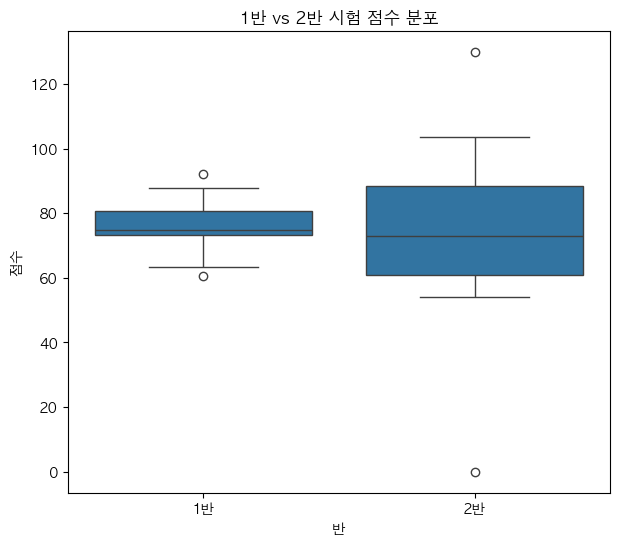

In [16]:
# 박스플롯을 사용하여 두 반의 분포 차이를 시각적으로 비교해 봅시다.
plt.figure(figsize=(7,6))
sns.boxplot(x='class', y='score', data=df3)

plt.title("1반 vs 2반 시험 점수 분포")
plt.xlabel("반")
plt.ylabel("점수")
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. 어떤 반의 점수 분산이 더 크고, 왜 그럴까요?  
-> 2반의 점수 분산이 더 크다. 표준편차가 크고, 0점·130점 같은 극단적인 이상값이 포함되어 있기 때문이다.  
- 점수 분포의 퍼짐 정도는 어떤 지표로 확인할 수 있을까요?  
-> 표준편차, 최소/최대값 같은 지표로 확인할 수 있다.  
- 이상값이 포함되면 표준편차나 범위는 어떻게 달라질까요?  
-> 표준편차와 범위가 커진다.  

2. 이상값이 있는 반의 평균은 어떤 영향을 받았나요?  
- 극단적으로 낮거나 높은 점수가 평균을 끌어내리거나 끌어올렸나요?  
-> 2반의 평균은 1반과 큰 차이는 없지만, 이는 0점과 130점이 서로 상쇄된 결과다. 일반적으로는 이상값이 평균을 왜곡시켜 끌어내리거나 끌어올린다.  
- 평균과 중앙값의 차이가 의미하는 바는 무엇인가요?  
-> 평균은 이상값에 민감하게 반응하지만, 중앙값은 데이터의 중간 위치를 보여주기 때문에 이상값의 영향을 덜 받는다.  

3. 박스플롯을 통해 이상값은 어떻게 드러나나요?  
- 이상값(outlier)은 박스플롯에서 어떤 형태로 나타나나요?  
-> 박스 수염을 벗어난 동그라미로 표시된다.  
- 두 반의 박스(사분위 범위)는 어떻게 다르게 보이나요?  
-> 2반의 박스(사분위 범위)가 1반보다 훨씬 크다. 이는 점수 분포가 더 넓게 퍼져 있다는 것을 의미한다.  

4. 평균만 보고 평가했을 때 생길 수 있는 오해는 무엇인가요?  
- 예를 들어, 교사가 평균 점수만 보고 2반이 부족하다고 판단한다면?  
-> 극소수의 고득점자나 저득점자의 존재를 알 수 없고, 분포의 실제 모양을 파악할 수 없다.  
- 중앙값이나 표준편차 같은 지표와 함께 분석하는 것은 왜 중요할까요?  
-> 평균만으로는 데이터의 분포와 이상값 영향을 알 수 없기 때문에, 중앙값·표준편차 같은 보조 지표를 함께 봐야 한다.  



# 문제 4. IQR 이상값 제거
**📘 문제**
- 앞의 문제에서 2반에는 **극단적인 이상값(예: 매우 낮은 점수)**이 포함되어 있어
통계 지표, 특히 평균에 큰 영향을 주는 것을 확인했습니다.
- 이번에는 **IQR(사분위 범위)**을 기준으로 이상값을 제거한 뒤, 이상값 제거 전후의 평균을 비교해 봅시다

<br>

**📌 아래를 수행해 보세요:**
- 2반의 점수 데이터를 대상으로 IQR 기준을 사용해 이상값을 판별하고 제거해 봅시다.
- 이상값 제거 전과 제거 후의 평균을 각각 계산해 봅시다.
- 이상값 제거가 평균에 어떤 영향을 주는지 설명해 봅시다.
- 필요하다면 중앙값과도 비교해 봅시다.

In [36]:
# 2반만 데이터 선택
class2_scores = df3.loc[df3['class'] == '2반', 'score']

# IQR 계산
Q1 = class2_scores.quantile(0.25)
Q3 = class2_scores.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f"Q1={Q1:.2f}, Q3={Q3:.2f}, IQ{IQR:.2f}")
print(f"하한={lower:.2f}, 상한={upper:.2f}")

# 이상값 마스크
outlier_mask = (class2_scores < lower) | (class2_scores > upper)

# 제거 전/후 데이터
scores_before = class2_scores
scores_after = class2_scores[~outlier_mask]

# 무엇이 제거되었는지 확인(선택)
removed_values = class2_scores[outlier_mask].sort_values().tolist()
print("제거된 값:", [round(v,2) for v in removed_values])
print(f"제거 개수: {outlier_mask.sum()}, 전체 {len(class2_scores)}")

Q1=60.75, Q3=88.37, IQ27.61
하한=19.33, 상한=129.79
제거된 값: [0.0, 130.0]
제거 개수: 2, 전체 30


In [37]:
# 이상값 제거 전후 평균(그리고 중앙값) 비교
mean_before = scores_before.mean()
median_before = scores_before.median()

mean_after = scores_after.mean()
median_after = scores_after.median()

print(f"제거 전 평균: {mean_before:.2f}, 중앙값: {median_before:.2f}")
print(f"제거 후 평균: {mean_after:.2f}, 중앙값: {median_after:.2f}")

제거 전 평균: 73.73, 중앙값: 73.00
제거 후 평균: 74.35, 중앙값: 73.00


**🧠 데이터를 어떻게 읽을까요?**

1. 이상값 제거 전후 평균은 어떻게 달라졌나요?  
-> 제거 전 평균: 73.73, 중앙값: 73.00  
-> 제거 후 평균: 74.35, 중앙값: 73.00  

- 평균이 중앙값에 가까워졌나요?  
-> 이번 데이터에서는 제거 전 평균이 중앙값과 더 가까웠다.  
   (낮은 이상값 0점과 높은 이상값 130점이 서로 상쇄되는 효과가 있었기 때문)  

- 이상값 제거가 평균에 어떤 방향으로 영향을 주었나요?  
-> 0점이 제거되면서 평균이 상승했지만, 중앙값과의 거리는 오히려 멀어졌다.  
   일반적으로는 이상값 제거 후 평균이 중앙값에 더 가까워지지만,  
   이번 데이터처럼 양쪽에 극단값이 동시에 존재하는 경우에는 다른 결과가 나올 수 있다.  

2. 왜 IQR을 기준으로 이상값을 판단할까요?  
-> IQR은 Q1(하위 25%)과 Q3(상위 25%)를 이용해 데이터를 4등분하고,  
   하한 = Q1 − 1.5×IQR, 상한 = Q3 + 1.5×IQR 범위를 벗어난 값을 이상값으로 정의한다.  

- 평균이나 표준편차 기준과 비교했을 때 어떤 점이 더 강건할까요?  
-> 평균·표준편차는 이상값에 크게 흔들리지만, IQR은 극단값에 덜 민감해 더 강건하다.  

3. 이상값은 언제 제거하고, 언제 유지해야 할까요?  
-> 입력 오류나 부정행위 같은 데이터라면 제거해야 한다.  
   하지만 특수한 사건이나 의미 있는 현상이라면 유지하는 것이 더 적절하다.  

4. 중앙값과 평균은 각각 어떤 상황에서 더 유용한 지표인가요?  
- 이상값이 있을 때 어떤 지표가 더 신뢰할 수 있나요?  
-> 중앙값이 더 신뢰할 수 있다.  

- 두 지표를 함께 보면 어떤 장점이 있을까요?  
-> 평균은 전체적인 수준을, 중앙값은 분포의 중심을 보여주므로  
   함께 보면 이상값 여부와 데이터의 균형 상태를 동시에 파악할 수 있다.  


# 문제 5. 변수 유형 분류
**📘 문제**
- 아래 데이터에서 변수의 유형(연속형, 범주형, 이산형 등)을 구분해 봅시다.
- 변수의 의미를 고려하여 어떤 분석 방식이 적절한지도 함께 생각해 봅시다.

<br>

**📌 아래를 수행해 보세요:**

1. 각 변수의 데이터 타입을 확인해 봅시다.

2. 변수의 의미를 기준으로 다음 중 어떤 유형에 해당하는지 분류해 봅시다.
    - 연속형 (numeric-continuous)
    - 이산형 (numeric-discrete)
    - 범주형 (categorical)
    - 서열형 범주 (ordinal-categorical)


In [31]:
# 데이터 생성
np.random.seed(2025)
df5 = pd.DataFrame({
    'age': np.random.randint(18, 65, 200),
    'coffee_type': np.random.choice(['아메리카노', '라떼', '카페모카'], 200),
    'size': np.random.choice(['Small', 'Medium', 'large'], 200),
    'price': np.random.normal(4500, 500, 200),
    'satisfaction': np.random.randint(1, 6, 200)
})

In [32]:
df5.head()
df5.dtypes

age               int64
coffee_type      object
size             object
price           float64
satisfaction      int64
dtype: object

**🧠 데이터를 어떻게 읽을까요?**

1. 숫자처럼 보이지만 사실은 범주형 또는 서열형으로 해석하는 변수가 있다면 무엇일까요?  
-> `satisfaction`은 1~5 점수로 저장되지만, 실제로는 서열형 범주 변수다.  
-> `size` 변수도 Small < Medium < Large 순서가 있으므로, 단순 문자열이 아니라 서열형 범주 변수로 해석할 수 있다.  

2. 변수 유형에 따라 적절한 분석 방법이나 시각화 방식은 어떻게 달라질까요?  
-> 연속형 변수 (age, price): 평균·분산 계산, 히스토그램/산점도, 회귀분석에 활용 가능  
-> 범주형 변수 (coffee_type): 빈도 분석, 막대그래프, 카이제곱 검정에 활용  
-> 서열형 범주 변수 (size, satisfaction): 순서를 고려한 분석(중앙값, 순위 검정), 막대그래프나 박스플롯으로 시각화 가능  


# 문제 6. 상관관계 분석
**📘 문제**
- 이번에는 변수들 간의 **관계(상관관계)**를 분석해 봅시다.
- 특히 기온(`temp`), 습도(`humidity`), 판매(`sales`) 변수 간의 관계를 수치와 시각화로 살펴보겠습니다.


<br>

**📌 아래를 수행해 보세요:**
1. 아래의 기온, 습도, 매출 데이터를 사용하여 상관계수 행렬을 출력해 봅시다.

2. 페어플롯(pairplot)을 이용하여 변수 간의 관계를 시각화해 봅시다.

In [33]:
# 데이터 생성
np.random.seed(2025)

temp = np.random.normal(25, 5, 100)
humidity = np.random.normal(60, 10, 100)
sales = temp * 10 - humidity * 2 + np.random.normal(0, 20, 100) + 200

df6 = pd.DataFrame({'temp': temp, 'humidity': humidity, 'sales': sales})

In [34]:
# 상관계수 행렬 출력
corr = df6.corr()
corr

,temp,humidity,sales
temp,1.000000,-0.141942,0.879387
humidity,-0.141942,1.000000,-0.456258
sales,0.879387,-0.456258,1.000000


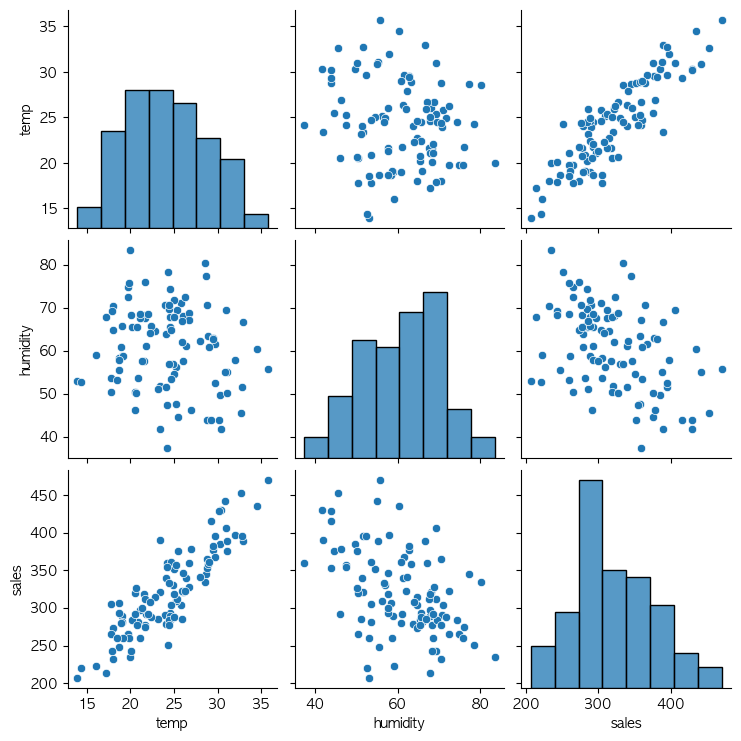

In [35]:
# 페어플롯(pairplot) 시각화
sns.pairplot(df6)
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. 출력된 상관계수 행렬을 보고,  
- 어떤 변수와 `sales` 간의 상관계수가 가장 높은가요?  
-> temp  

- 어느 쌍이 **양의 상관관계**, 어느 쌍이 **음의 상관관계**인가요?  
-> temp와 sales는 약 0.88로 강한 양의 상관관계  
-> humidity와 sales는 -0.46으로 음의 상관관계  
-> temp와 humidity는 -0.14로 거의 상관 없음  

2. 페어플롯에서  
- 어떤 변수 쌍은 **직선 형태**로 관계가 보이나요?  
-> temp vs sales: 우상향 패턴 → 기온이 올라가면 매출도 늘어나는 경향  
-> humidity vs sales: 우하향 패턴 → 습도가 높을수록 매출은 줄어드는 경향  

- 어떤 변수 쌍은 **분산이 크거나 패턴이 없는**가요?  
-> temp vs humidity: 점들이 흩어져 있어 뚜렷한 관계 없음  

3. **상관관계가 반드시 인과관계를 의미하지는 않습니다.**  
- 온도와 매출에 상관관계가 있다고 해서, 온도가 매출을 직접적으로 증가시킨다고 볼 수 있을까요?  
-> 직접적인 인과관계라고 단정할 수 없다.  
   예를 들어 더운 날씨에는 사람들이 시원한 음료를 더 많이 찾을 수 있고,  
   휴가철이나 계절적 요인 같은 제3의 요인이 동시에 매출에 영향을 줄 수도 있다.  

4. 이 데이터를 바탕으로 어떤 **추가 가설**이나 **실험 설계**를 생각해볼 수 있을까요?  
-> 날씨 외에도 요일, 시간대, 이벤트 여부(예: 할인 행사), 고객 특성 같은 변수를 추가해 매출과의 관계를 비교해볼 수 있다.  
-> 실제로 온도가 매출에 영향을 주는지 확인하려면, 동일한 조건에서 온도만 달라질 때 매출 변화를 관찰하는 실험 설계가 필요하다.  
